# Explanation of the `golden_ratio_flower` Function

Inspired by Numberphile video on the Golden Ratio: https://www.youtube.com/watch?v=sj8Sg8qnjOg&t=311s. 

The `golden_ratio_flower` function generates a floral-like spiral pattern by iteratively rotating a point and scaling its distance outward at fixed intervals. Although the golden ratio is computed, it is not directly used in the algorithm. The function defines a rotation angle based on $\pi$, applies a 2D rotation matrix, and progressively increases the distance from the origin after a set number of rotations. The points are plotted as black dots, creating a pattern reminiscent of natural seed arrangements. The plot maintains equal axis scaling to preserve symmetry, resulting in an elegant, organic design.


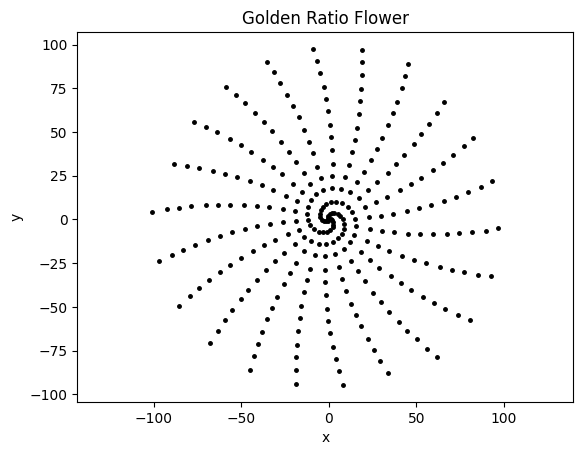

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def golden_ratio_flower():
    """
    Generates and plots a 'Golden Ratio Flower' pattern.
    
    This function computes seed positions by repeatedly rotating a point 
    and then scaling its magnitude after a fixed number of rotations.
    The resulting set of points produces a spiral flower-like pattern,
    similar to natural seed arrangements.
    """
    # Although the golden ratio is computed here, it is not used in the algorithm.
    phi = (1 + np.sqrt(5)) / 2.0
    rotations = int(np.pi)  # This is equivalent to 3   
    NTRIES = rotations * 100  # Increase multiplier for a denser pattern.
    theta_deg = 360.0 / np.pi  # Angle in degrees.
    theta = theta_deg * np.pi / 180.0  # Convert degrees to radians.
    # Create the 2D rotation matrix for the computed angle.
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    # Initialize lists for x and y coordinates.
    x = [1.0]  # Start at (1, 0)
    y = [0.0]
    # Define the scaling parameters.
    L = 1.0  # Current scaling factor (seed distance from origin)
    D = 1.0  # Increment to apply to L after each complete set of rotations.
    count = 0  # Counter to track the number of rotations since the last scaling.
    # Generate seed positions.
    for i in range(NTRIES):
        # Rotate the previous point using the rotation matrix.
        current_point = np.array([x[i], y[i]])
        new_point = np.dot(R, current_point)
        count += 1
        
        # After a fixed number of rotations, scale the new point so seeds spread out.
        if count >= rotations:
            count = 0
            L += D
            # Normalize new_point and scale it to have length L.
            norm = np.sqrt(new_point[0]**2 + new_point[1]**2)
            if norm == 0:
                norm = 1  # safeguard against division by zero
            new_point = (L * new_point) / norm
        
        # Append the computed coordinates.
        x.append(new_point[0])
        y.append(new_point[1])
    
    # Create a new figure and plot the generated points.
    plt.figure()
    plt.plot(x, y, 'k.', markersize=5)  # 'k.' plots small black dots.
    plt.axis('equal')  # Ensure equal scaling on both axes.
    plt.title("Golden Ratio Flower")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Call the function to generate and display the plot.
golden_ratio_flower()

# Golden Ratio Flower Animation

This Python script generates and animates a **Golden Ratio Flower**, a pattern inspired by natural growth processes such as sunflower seed arrangements. The animation starts with an empty plot and gradually reveals each point, following a mathematical spiral.

1. **Generating the Flower Pattern**
The function `create_golden_ratio_figure()`:
- Computes points using a **rotation matrix** and **scaling** factors.
- Starts from a single seed and **rotates** it repeatedly.
- After a fixed number of rotations, the seed’s distance from the origin increases, creating a spiral.
- Stores all computed `(x, y)` coordinates for plotting.

2. **Animating the Growth**
The function `animate_golden_ratio_flower()`:
- Starts with an **empty plot**.
- Iteratively **adds one point at a time** in black (`'k.'`).
- Uses `matplotlib.animation.FuncAnimation` to create a **smooth animation**.
- Saves the animation as a **GIF** (`golden_ratio_flower.gif`).

3. **Running the Code**
- The script first **generates** the static figure with `fig, ax, x, y = create_golden_ratio_figure()`.
- Then, it **animates** the sequential appearance of points with `animate_golden_ratio_flower(fig, ax, x, y)`.

This results in a mesmerizing visualization of **nature’s mathematical beauty**!


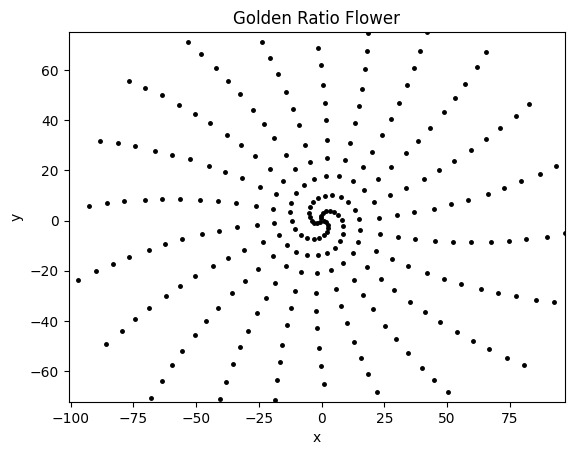

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def create_golden_ratio_figure():
    """
    Generates the data for the 'Golden Ratio Flower' and returns figure, axes, and coordinates.
    """
    rotations = int(np.pi)  # Number of rotations before scaling
    NTRIES = rotations * 100  # Total number of points
    
    theta_deg = 360.0 / np.pi  # Angle in degrees
    theta = theta_deg * np.pi / 180.0  # Convert degrees to radians
    
    # Rotation matrix
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    
    # Initialize coordinate lists
    x = [1.0]
    y = [0.0]

    L = 1.0  # Scaling factor
    D = 1.0  # Increment for scaling
    count = 0  # Counter for rotations

    # Generate seed positions
    for i in range(NTRIES):
        current_point = np.array([x[i], y[i]])
        new_point = np.dot(R, current_point)
        count += 1
        
        if count >= rotations:
            count = 0
            L += D
            norm = np.sqrt(new_point[0]**2 + new_point[1]**2)
            if norm == 0:
                norm = 1
            new_point = (L * new_point) / norm
        
        x.append(new_point[0])
        y.append(new_point[1])

    # Create figure and axis
    fig, ax = plt.subplots()
    ax.set_title("Golden Ratio Flower")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis("equal")
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))

    return fig, ax, x, y  # Return figure, axes, and data points


def animate_golden_ratio_flower(fig, ax, x, y, save_gif=True):
    """
    Creates an animation of the 'Golden Ratio Flower' where points appear one by one in black.
    """
    # Start with an empty scatter plot
    scatter, = ax.plot([], [], 'k.', markersize=5)  

    def update(frame):
        scatter.set_data(x[:frame], y[:frame])  # Add points progressively in black
        return scatter,

    ani = animation.FuncAnimation(fig, update, frames=len(x), interval=5, blit=True)

    if save_gif:
        ani.save("golden_ratio_flower.gif", writer="pillow", fps=30)

    plt.show()

# Generate the static figure (empty at first)
fig, ax, x, y = create_golden_ratio_figure()

# Animate the points appearing one by one in black
animate_golden_ratio_flower(fig, ax, x, y)

# Using Turtle to create a golden angle

This Python script uses the `turtle` module to visualize the **Golden Angle**, a fundamental concept in nature that governs the arrangement of leaves, petals, and seeds in plants. The **Golden Angle** is approximately **137.5°**, derived from the **Golden Ratio**, and is responsible for the spiral patterns seen in sunflowers and pinecones.

The function `drawCircle(x, y, radius, color)` is used to create a filled circle at a given position with a specific color. This function is first called to draw the **trunk** of the pattern, represented as a brown circle at the center of the canvas.

The turtle, `myPen`, is then set up with a **pen width of 4**, facing **upward (90°)**. The loop iterates **50 times**, drawing a branch each time by moving forward **150 pixels**, then retracting back to the starting position. After each branch is drawn, the turtle rotates **137.5°** to the right, following the **Golden Angle**. This results in a visually appealing spiral effect, mimicking the growth pattern seen in plants.

A `time.sleep(1)` delay is included, making the animation **progressive**, so each branch appears one at a time, helping to visualize the structure forming dynamically. The result is an elegant, mathematically inspired pattern that demonstrates nature's efficiency in distributing growth points.

In [ ]:
#Golden Angle - www.101computing.net/golden-angle
import turtle
import time

def drawCircle(x, y, radius, color):
    global myPen
    myPen.setheading(0)
    myPen.penup()
    myPen.color(color)
    myPen.fillcolor(color)
    myPen.goto(x,y-radius)
    myPen.begin_fill()
    myPen.circle(radius)
    myPen.end_fill()
    myPen.pendown()
    
myPen = turtle.Turtle()
myPen.hideturtle()
myPen.speed(0)

#Draw Trunc
drawCircle(0, 0, 20 , "#705623")

myPen.goto(0,0)
myPen.width(4)
goldenAngle=137.5
myPen.setheading(90)

for branch in range(0,50):
  #Draw Branch
  myPen.forward(150)
  myPen.forward(-150)
  myPen.right(goldenAngle)
  time.sleep(1)

# Using turtle to create a spiral phyllotaxis pattern

This Python script uses the `turtle` module to create a **spiral phyllotaxis pattern**, mimicking the natural arrangement of seeds in a sunflower head. The pattern is based on **137.508°**, a close approximation of the **Golden Angle**, which governs how plants distribute seeds, leaves, and petals efficiently.

The function `drawPhyllotacticPattern()` generates the spiral pattern by computing the radius `r` and angle `theta` for each point using the formula:
\[
r = c \times \sqrt{n}, \quad \theta = n \times \phi
\]
where `cspread` scales the distance between points, and `phi` converts the **Golden Angle** into radians for rotation.

The turtle moves outward in a spiral, placing **stamps** (small circles) at each computed `(x, y)` coordinate. At a certain point (`petalstart`), instead of stamping, the script begins drawing **petals** using `drawPetal()`, creating a more flower-like appearance.

The `drawPetal()` function defines each petal as a filled yellow shape with curved edges, simulating real sunflower petals. The turtle moves forward and rotates systematically to form a **four-sided petal structure**, then fills it with color.

The script starts with a **fast-moving turtle** (`speed(0)`) to ensure smooth animation. After completing the pattern, the turtle moves far away (`forward(1000)`) to clear the screen for a better view of the finished artwork. The resulting image is a **beautiful, mathematically accurate sunflower-like spiral**, demonstrating nature’s efficiency in arranging elements.

In [ ]:
# Spiral Phyllotaxis Demo
#
# Example for VSFX 705
# Turtle Sunflowers - Introduce Phyllotactic Pattern
#
# Author: Deborah R. Fowler
#
# March 21, 2013
# Based on original code in C 1989 using Silicon Graphics Workstations and gl
import math
import turtle

def drawPhyllotacticPattern(turtle, t, petalstart, angle = 137.508, size = 2, cspread = 4 ):
    """print a pattern of circles using spiral phyllotactic data"""
    # initialize position
    # turtle.pen(outline=1,pencolor="black",fillcolor="orange")
    turtle.color('black')
    turtle.fillcolor("orange")
    phi = angle * ( math.pi / 180.0 )
    xcenter = 0.0
    ycenter = 0.0
   
    # for loops iterate in this case from the first value until < 4, so
    for n in range (0,t):
        r = cspread * math.sqrt(n)
        theta = n * phi
        
        x = r * math.cos(theta) + xcenter
        y = r * math.sin(theta) + ycenter

        # move the turtle to that position and draw 
        turtle.up()
        turtle.setpos(x,y)
        turtle.down()
        # orient the turtle correctly
        turtle.setheading(n * angle)
        if n > petalstart-1:
            turtle.color("yellow")
            drawPetal(turtle,x,y)
        else: turtle.stamp()
            

def drawPetal(turtle, x, y ):
    turtle.penup()
    turtle.goto(x,y)
    turtle.pendown()
    turtle.color('black')
    turtle.fillcolor('yellow')
    turtle.begin_fill()
    turtle.right(20)
    turtle.forward(70)
    turtle.left(40)
    turtle.forward(70)
    turtle.left(140)
    turtle.forward(70)
    turtle.left(40)
    turtle.forward(70)
    turtle.penup()
    turtle.end_fill() # this is needed to complete the last petal


tina = turtle.Turtle()
tina.shape("turtle")
tina.speed(0) # make the turtle go as fast as possible
drawPhyllotacticPattern(tina, 200, 160, 137.508 )
tina.penup()
tina.forward(1000)
# tina.exitonclick() # lets you x out of the window when outside of idle
